# Naive Bayes Model

This code implements the naive bayes model:
For this model, the dataset should start with negative articles then positive articles
This is done to get an equal number of positive and negative artiles from the datatset 

In [9]:
# importing important packages
import string

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.stem.porter import PorterStemmer
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.metrics import confusion_matrix
from nltk.corpus import stopwords

In [10]:
# importing data from csv file specifying 700 articles

df = pd.read_csv("data/df_article_text.csv", nrows = 700)

df.head

<bound method NDFrame.head of      label                                       article_text
0        0  An investigation into East Kent Hospitals’ mat...
1        0  The coverage on this live blog has ended — but...
2        0  Scammers are carrying out sextortion cybercrim...
3        0  The "CBS This Morning Podcast" offers listener...
4        0  Yamaha has always been know for tremendous val...
..     ...                                                ...
695      1  The coronavirus hit Chile at a particularly de...
696      1  They say that truth is the first casualty in w...
697      1  U.S. educators are allegedly on the take from ...
698      1  Seniors With COVID-19 Show Unusual Symptoms, D...
699      1  So far 2020 has had fires, the pandemic, murde...

[700 rows x 2 columns]>

In [12]:
# split training data from testing data
X_train, X_test, y_train, y_test = train_test_split(df['article_text'], df['label'], random_state=1)

In [13]:
# converting word abstracts into word count vectors
cv = CountVectorizer(strip_accents='ascii', token_pattern=u'(?ui)\\b\\w*[a-z]+\\w*\\b', lowercase=True, stop_words='english')
X_train_cv = cv.fit_transform(X_train)
X_test_cv = cv.transform(X_test)

In [14]:
# fitting the naive bayes model and make predictions

from sklearn.naive_bayes import MultinomialNB
naive_bayes = MultinomialNB()
naive_bayes.fit(X_train_cv, y_train)
predictions = naive_bayes.predict(X_test_cv)

In [15]:
# checking performance results of the model

print('Accuracy score: ', accuracy_score(y_test, predictions))
print('Precision score: ', precision_score(y_test, predictions))
print('Recall score: ', recall_score(y_test, predictions))

Accuracy score:  0.8685714285714285
Precision score:  0.8952380952380953
Recall score:  0.8867924528301887


Text(91.68, 0.5, 'predicted label')

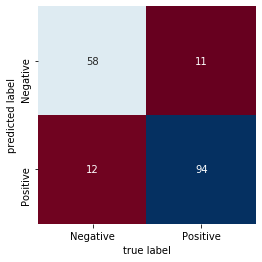

In [16]:
# plotting results to visualize how predicted label compares to the true label

cm = confusion_matrix(y_test, predictions)
sns.heatmap(cm, square=True, annot=True, cmap='RdBu', cbar=False,
xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.xlabel('true label')
plt.ylabel('predicted label')

In [28]:
# print out the results of the model

testing_predictions = []
for i in range(len(X_test)):
    if predictions[i] == 1:
        testing_predictions.append('Positive')
    else:
        testing_predictions.append('Negative')
check_df = pd.DataFrame({'actual_label': list(y_test), 'prediction': testing_predictions, 'abstract':list(X_test)})
check_df.replace(to_replace=0, value='Negative', inplace=True)
check_df.replace(to_replace=1, value='Positive', inplace=True)

print(check_df)

    actual_label prediction                                           abstract
0       Positive   Positive  (Natural News) The news is stressing Americans...
1       Positive   Positive  Thank you to our readers, commenters and suppo...
2       Positive   Positive  We all suffer some form of professional bias. ...
3       Positive   Positive  Chicago in “deep planning stages” of mass vacc...
4       Positive   Negative  Voters in the three-county Portland, Oregon, m...
..           ...        ...                                                ...
170     Positive   Positive  Aangirfan Showing posts with label Fauci . Sho...
171     Negative   Negative  We are publishing personal essays from CNN's g...
172     Negative   Negative  Dr. Dave Campbell, Chief Medical Correspondent...
173     Positive   Positive  A firefighter walks past a private hospice aft...
174     Negative   Negative  Editor’s note: The Salt Lake Tribune is provid...

[175 rows x 3 columns]
